In [32]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

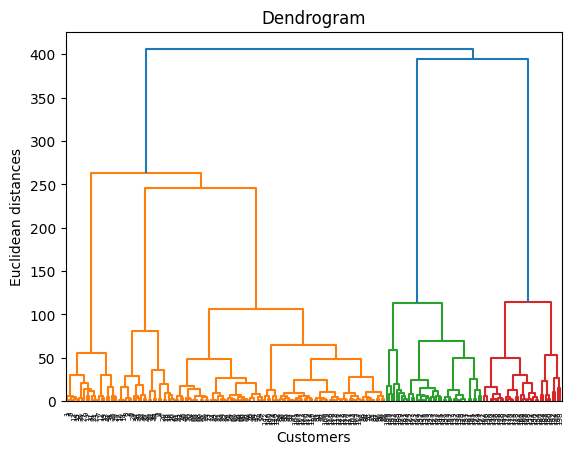

In [36]:
x=df.iloc[:,[3,4]].values
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


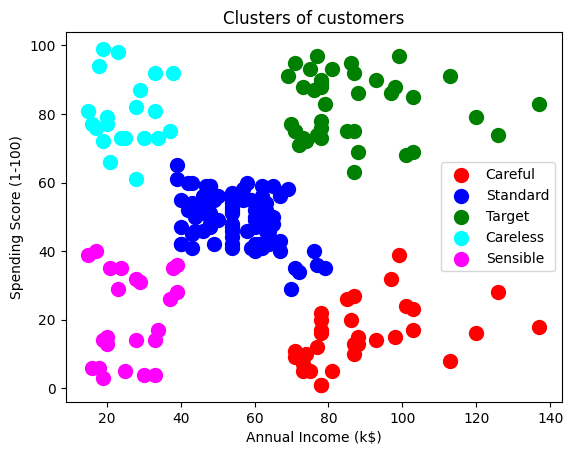

In [37]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Careful')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='magenta',label='Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_hc)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.553


# All-Data

In [39]:
df=pd.read_csv('all-data.csv',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [40]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
text_col = df.columns[1]
print("Text column:", text_col).


Text column: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_data = df[text_col]
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=1000   
)
X_tfidf = vectorizer.fit_transform(text_data)
print("Text column used:", text_col)
print("TF-IDF matrix shape:", X_tfidf.shape)

Text column used: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
TF-IDF matrix shape: (4845, 1000)


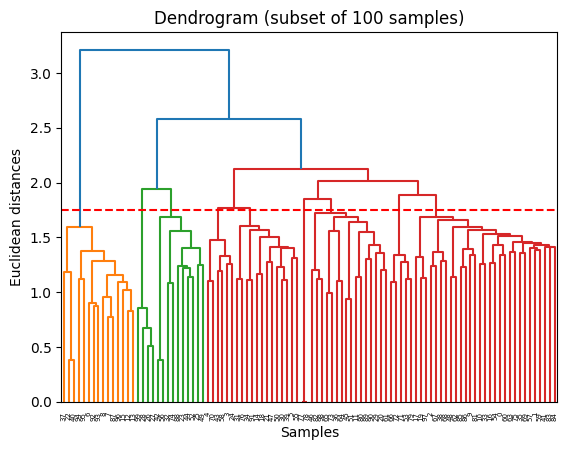

In [ ]:
x_subset = X_tfidf[:100].toarray()
dendrogram = sch.dendrogram(sch.linkage(x_subset, method='ward'))
plt.axhline(y=1.75, color='r', linestyle='--')  
plt.title('Dendrogram (subset of 100 samples)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

Cluster labels for the subset of samples: [2 2 2 4 4 4 3 3 3 2 2 1 3 3 4 3 2 2 4 2 1 4 3 0 4 0 0 0 0 1 4 4 0 2 4 2 1
 3 2 4 3 2 0 4 0 1 1 4 2 0 4 1 0 2 2 4 0 2 4 2 2 1 2 2 1 1 2 2 2 2 4 2 2 1
 0 2 4 1 1 2 1 2 1 2 2 2 2 3 0 1 1 4 3 3 3 3 3 2 1 0]


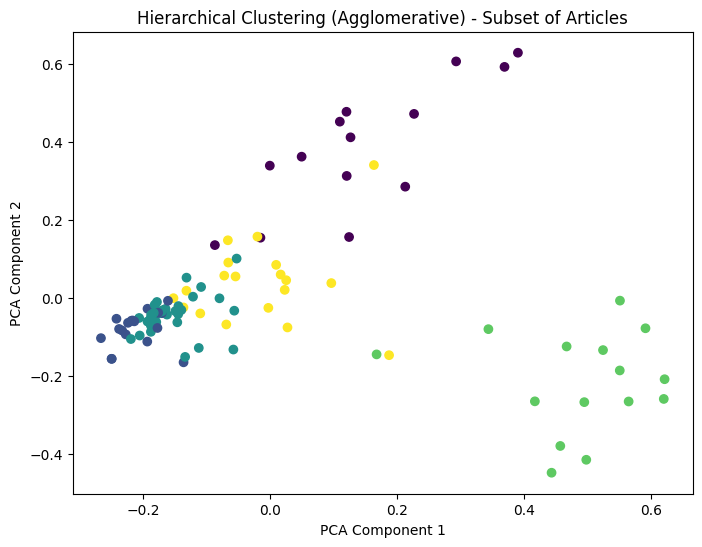

In [45]:
from sklearn.decomposition import PCA
model = AgglomerativeClustering(
    n_clusters=5,
    metric="euclidean",
    linkage="ward"
)
labels = model.fit_predict(x_subset)
print("Cluster labels for the subset of samples:", labels)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(x_subset)
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="viridis")
plt.title("Hierarchical Clustering (Agglomerative) - Subset of Articles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [46]:
silhouette_score = silhouette_score(x_subset, labels)
print("Silhouette Score for the subset of samples: %.3f" % silhouette_score)

Silhouette Score for the subset of samples: 0.047
